<a href="https://colab.research.google.com/github/mathu3004/Bank_Marketing_MachineLearning_CW/blob/main/Bank_Marketing_CM2604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mathusha Kannathasan

RGU ID: 2410212

IIT ID: 20233136

In [1]:
pip install --upgrade scikit-learn

In [2]:
pip install --upgrade imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.4
    Uninstalling imbalanced-learn-0.12.4:
      Successfully uninstalled imbalanced-learn-0.12.4


In [3]:
# Import the google.colab module to access the 'drive' object (mount drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Data**

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
from collections import Counter
from matplotlib import cm

In [5]:
# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/2410212_CM2604/bank-additional-full.csv'
data = pd.read_csv(file_path, delimiter=';')

# Display first few rows
df = pd.DataFrame(data)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# **Exploratory Data Analysis (EDA)**

In [7]:
# Basic information about the dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   4

In [8]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.5788

In [9]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [10]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(data.duplicated().sum())


Duplicate Rows:
12


In [11]:
# Value counts for the target variable
print("\nTarget Variable Distribution:")
print(data['y'].value_counts())


Target Variable Distribution:
y
no     36548
yes     4640
Name: count, dtype: int64


In [12]:
# Checking unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
print()
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")
    print(data[col].unique())
    print()
    print(data[col].value_counts())
    print()
    print()


Unique Values in Categorical Columns:

job: 12 unique values
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


marital: 4 unique values
['married' 'single' 'divorced' 'unknown']

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


education: 8 unique values
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic

In [13]:
# Count of 'unknown' values in categorical columns
for col in categorical_cols:
    unknown_count = (data[col] == 'unknown').sum()
    total_count = len(data)
    print(f"\nProcessing column: {col}")
    print(f"  'unknown' values: {unknown_count} out of {total_count} ({(unknown_count / total_count) * 100:.2f}%)")


Processing column: job
  'unknown' values: 330 out of 41188 (0.80%)

Processing column: marital
  'unknown' values: 80 out of 41188 (0.19%)

Processing column: education
  'unknown' values: 1731 out of 41188 (4.20%)

Processing column: default
  'unknown' values: 8597 out of 41188 (20.87%)

Processing column: housing
  'unknown' values: 990 out of 41188 (2.40%)

Processing column: loan
  'unknown' values: 990 out of 41188 (2.40%)

Processing column: contact
  'unknown' values: 0 out of 41188 (0.00%)

Processing column: month
  'unknown' values: 0 out of 41188 (0.00%)

Processing column: day_of_week
  'unknown' values: 0 out of 41188 (0.00%)

Processing column: poutcome
  'unknown' values: 0 out of 41188 (0.00%)

Processing column: y
  'unknown' values: 0 out of 41188 (0.00%)


# **Data Visualization**

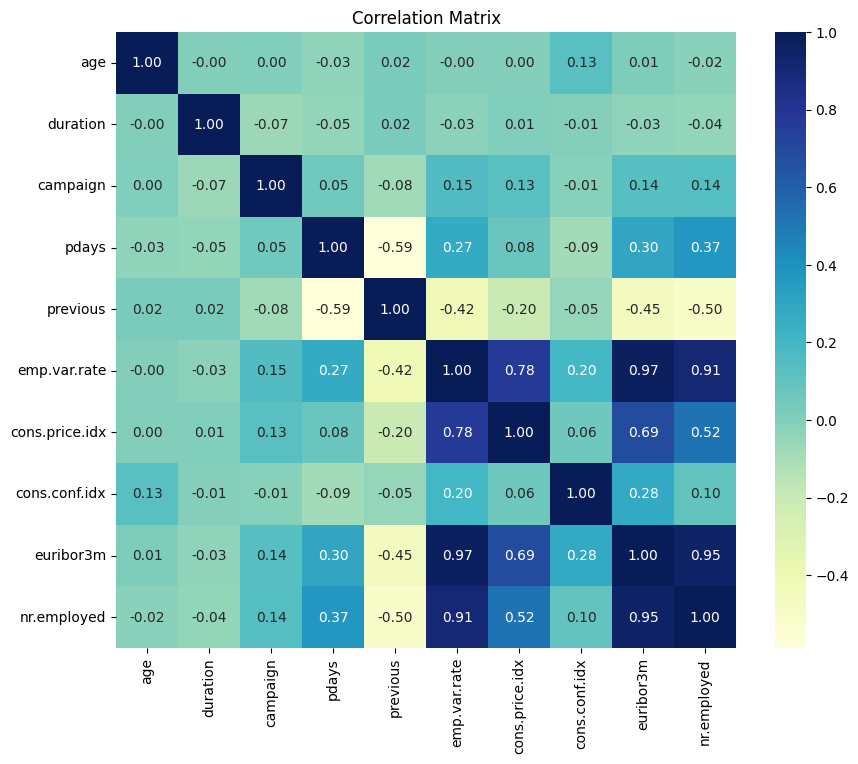

In [14]:
# Visualize correlation (for numerical columns)
numerical_data = data.select_dtypes(include=['number'])

# Calculate correlation
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()

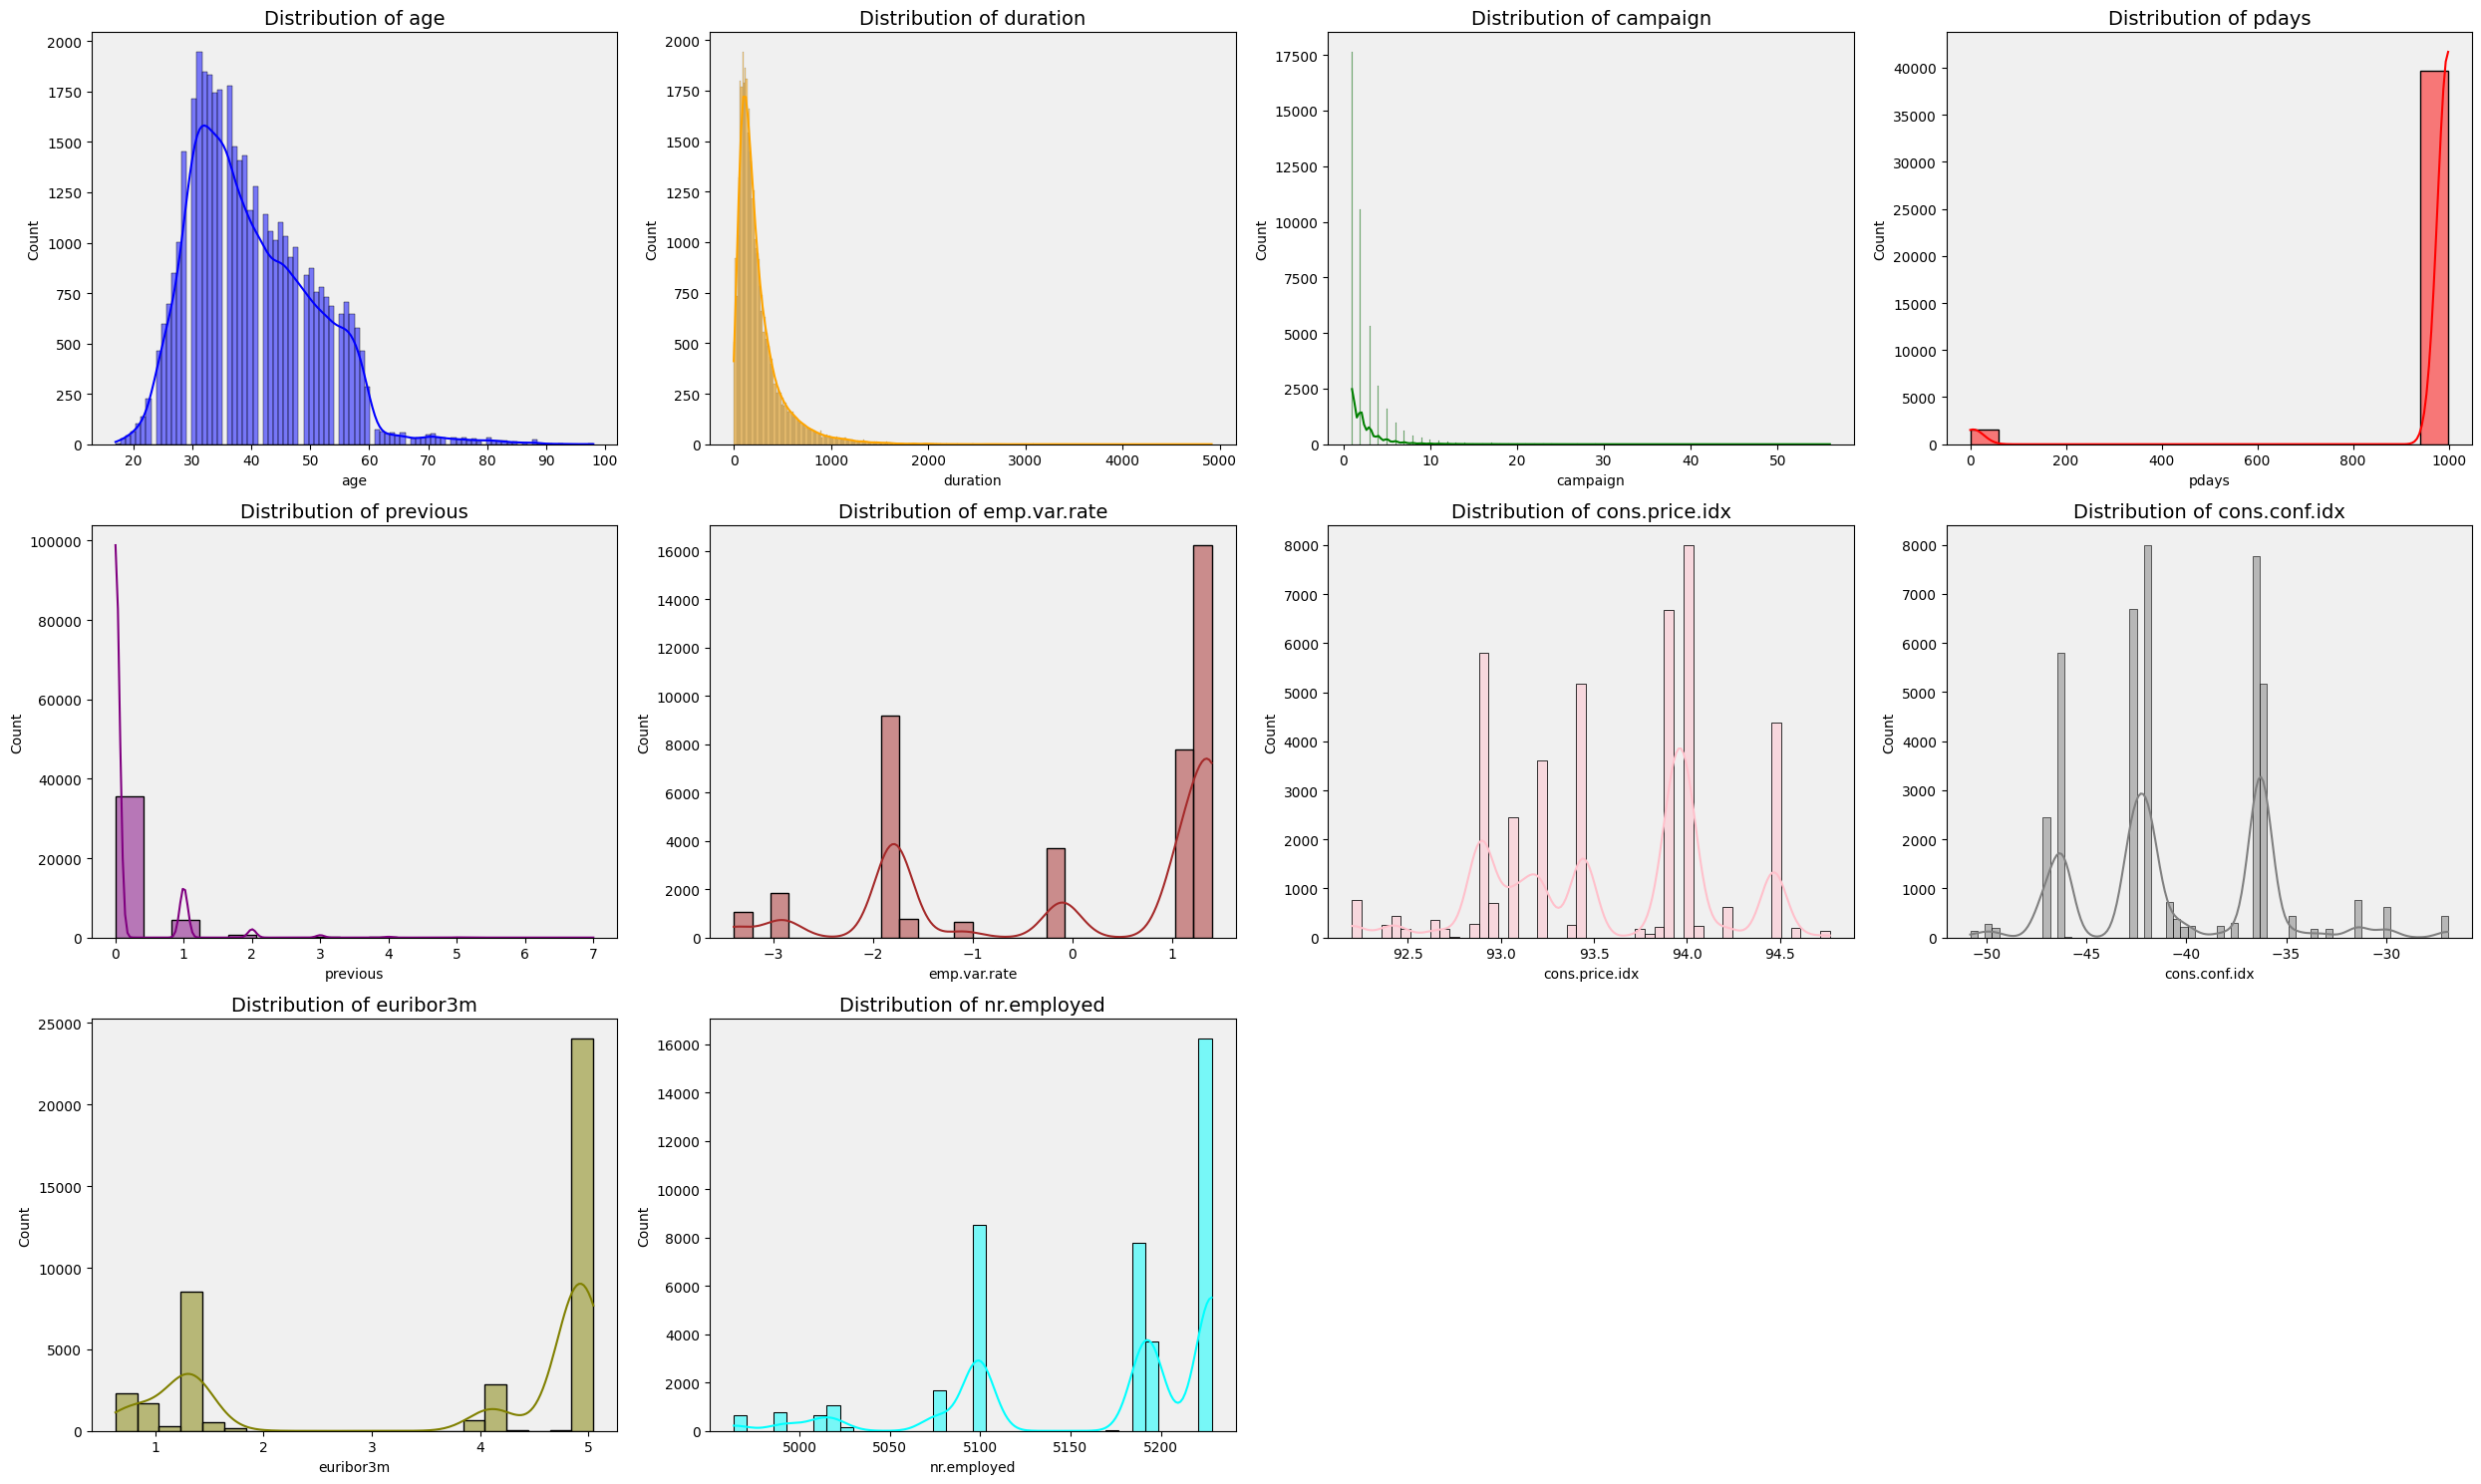

In [15]:
# Histogram of Numerical Variables
hist_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
background_color = '#f0f0f0'

# Number of plots per row
plots_per_row = 4

# Total number of plots
total_plots = len(numerical_data.columns)

# Number of rows needed
rows = math.ceil(total_plots / plots_per_row)

# Create subplots
fig, axes = plt.subplots(rows, plots_per_row, figsize=(25, 5 * rows))
axes = axes.flatten()  # Flatten axes for easy indexing

# Iterate over numerical columns and create histograms
for i, col in enumerate(numerical_data.columns):
    sns.histplot(numerical_data[col], kde=True, ax=axes[i], color=hist_colors[i % len(hist_colors)])  # Cycle colors
    axes[i].set_title(f"Distribution of {col}", fontsize=14)
    axes[i].set_facecolor(background_color)  # Set background color

# Remove empty subplots
for j in range(len(numerical_data.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

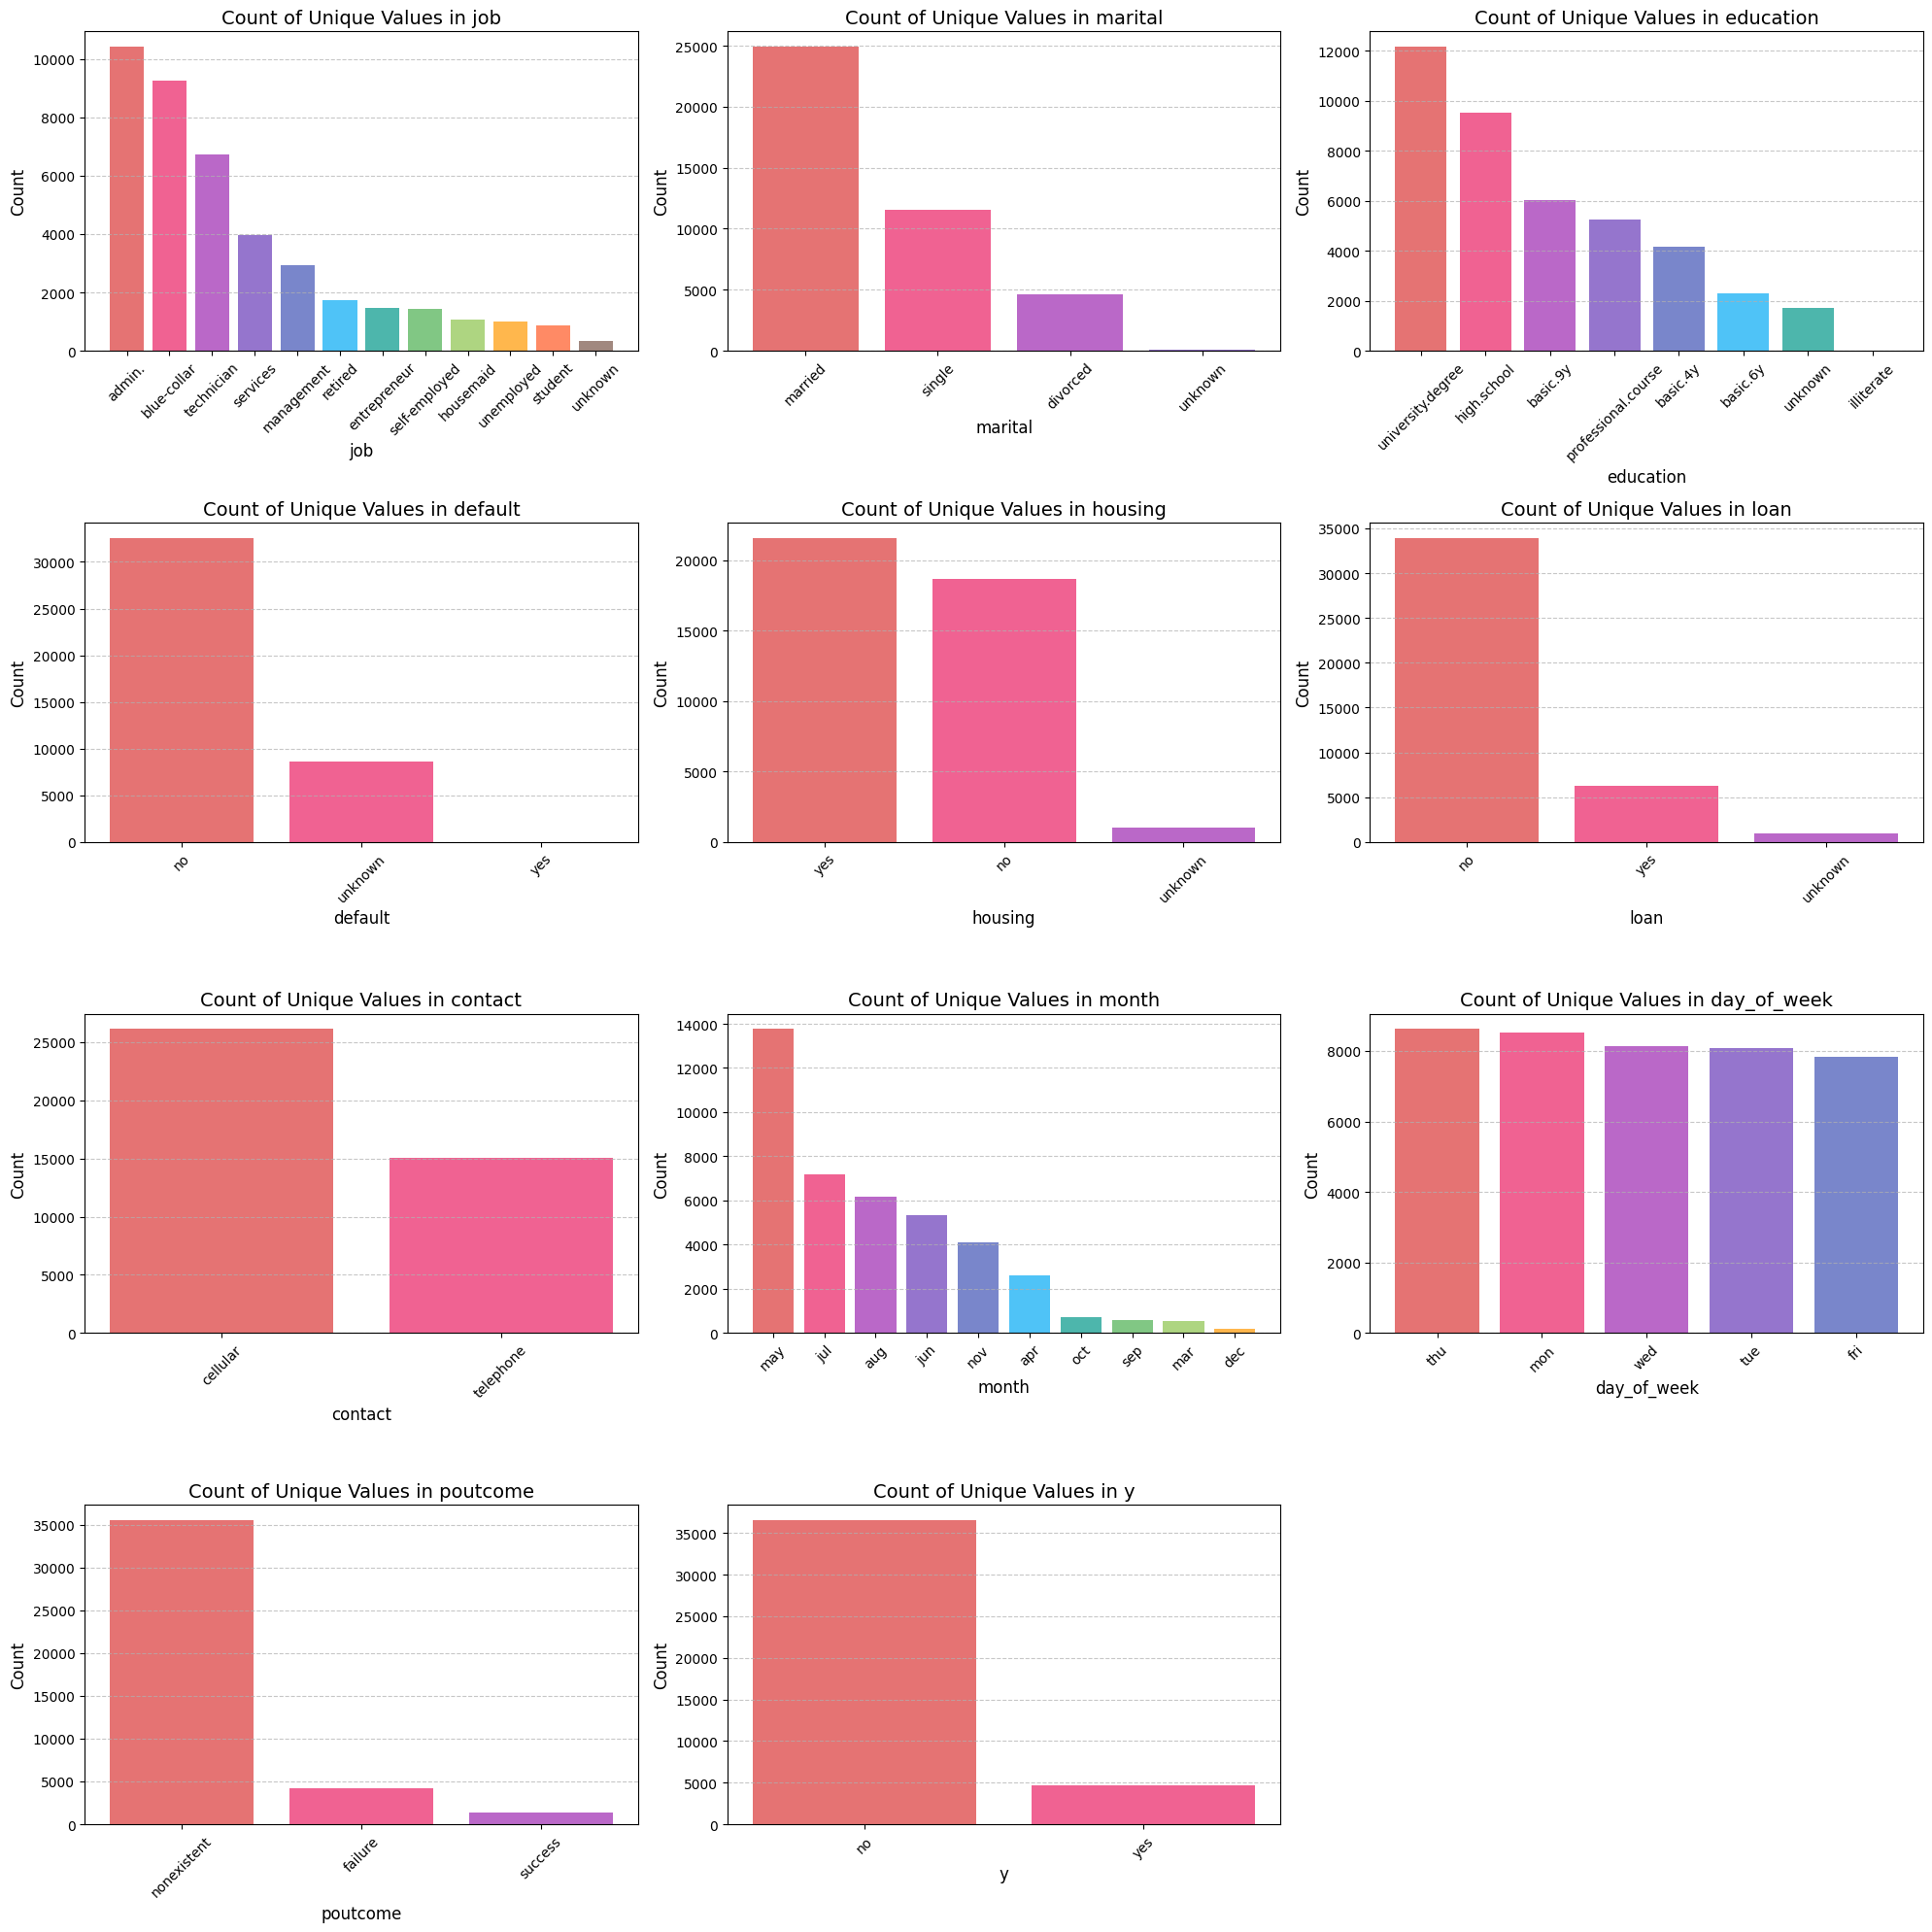

In [16]:
# Bar Chart for Categorical Variables
colors_12 = ['#E57373', '#F06292', '#BA68C8', '#9575CD', '#7986CB',
             '#4FC3F7', '#4DB6AC', '#81C784', '#AED581', '#FFB74D',
             '#FF8A65', '#A1887F']

# Function to plot count bar charts with 12 colors
def plot_categorical_counts_with_limited_colors(data, categorical_cols, plots_per_row=3):
    total_plots = len(categorical_cols)
    rows = math.ceil(total_plots / plots_per_row)  # Calculate required rows
    fig, axes = plt.subplots(rows, plots_per_row, figsize=(20, 5 * rows))
    axes = axes.flatten()  # Flatten axes array for easy indexing

    for i, col in enumerate(categorical_cols):
        ax = axes[i]

        # Calculate value counts and ensure correct ordering
        counts = data[col].value_counts()
        categories = counts.index

        # Use the same 12 colors, cycling as needed
        bar_colors = colors_12 * (len(categories) // len(colors_12) + 1)

        # Plot count bar chart
        ax.bar(categories, counts, color=bar_colors[:len(categories)])

        # Set plot titles and labels
        ax.set_title(f'Count of Unique Values in {col}', fontsize=14)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Remove empty subplots
    for j in range(total_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Plot count bar charts for all categorical columns with a 12-color palette
plot_categorical_counts_with_limited_colors(data, categorical_cols)

# **Handle Unknown Values**

In [17]:
# Handle some categorical columns' 'unknown' values by mode and some as 'unknown' category
def handle_unknown_values(df):
    for column in ['marital', 'contact', 'month', 'day_of_week', 'poutcome']:
       # Check if 'unknown' exists in the column
        if 'unknown' in df[column].unique():
            mode_value = df[column].mode()[0]  # Calculate the mode of the column
            df[column] = df[column].replace('unknown', mode_value)

# Apply the function to handle 'unknown' values
handle_unknown_values(data)

print(f"Number of rows after handling unknown: {data.shape[0]}")
# Verify if all missing values are handled after imputation
missing_values_after = data.isnull().sum()
print("Columns with remaining missing values:")
print(missing_values_after[missing_values_after > 0])

Number of rows after handling unknown: 41188
Columns with remaining missing values:
Series([], dtype: int64)


# **Impute Missing Values**

In [18]:
# Impute missing values in categorical columns with the most frequent value (mode)
def impute_missing_values(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    for column in categorical_columns:
        if df[column].isnull().sum() > 0:
            mode_value = df[column].mode()[0]  # Calculate the mode of the column
            df[column].fillna(mode_value, inplace=True)

# Impute missing values in the dataset
impute_missing_values(data)

# Verify if all missing values are handled after imputation
missing_values_after = data.isnull().sum()
print("Columns with remaining missing values:")
print(missing_values_after[missing_values_after > 0])

Columns with remaining missing values:
Series([], dtype: int64)


# **Remove Duplicates**

In [19]:
# Display the number of rows before removing duplicates
print(f"Number of rows before removing duplicates: {data.shape[0]}")

# Remove duplicate rows from the dataset
data = data.drop_duplicates()

# Display the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {data.shape[0]}")

Number of rows before removing duplicates: 41188
Number of rows after removing duplicates: 41176


# **Data Visualization**

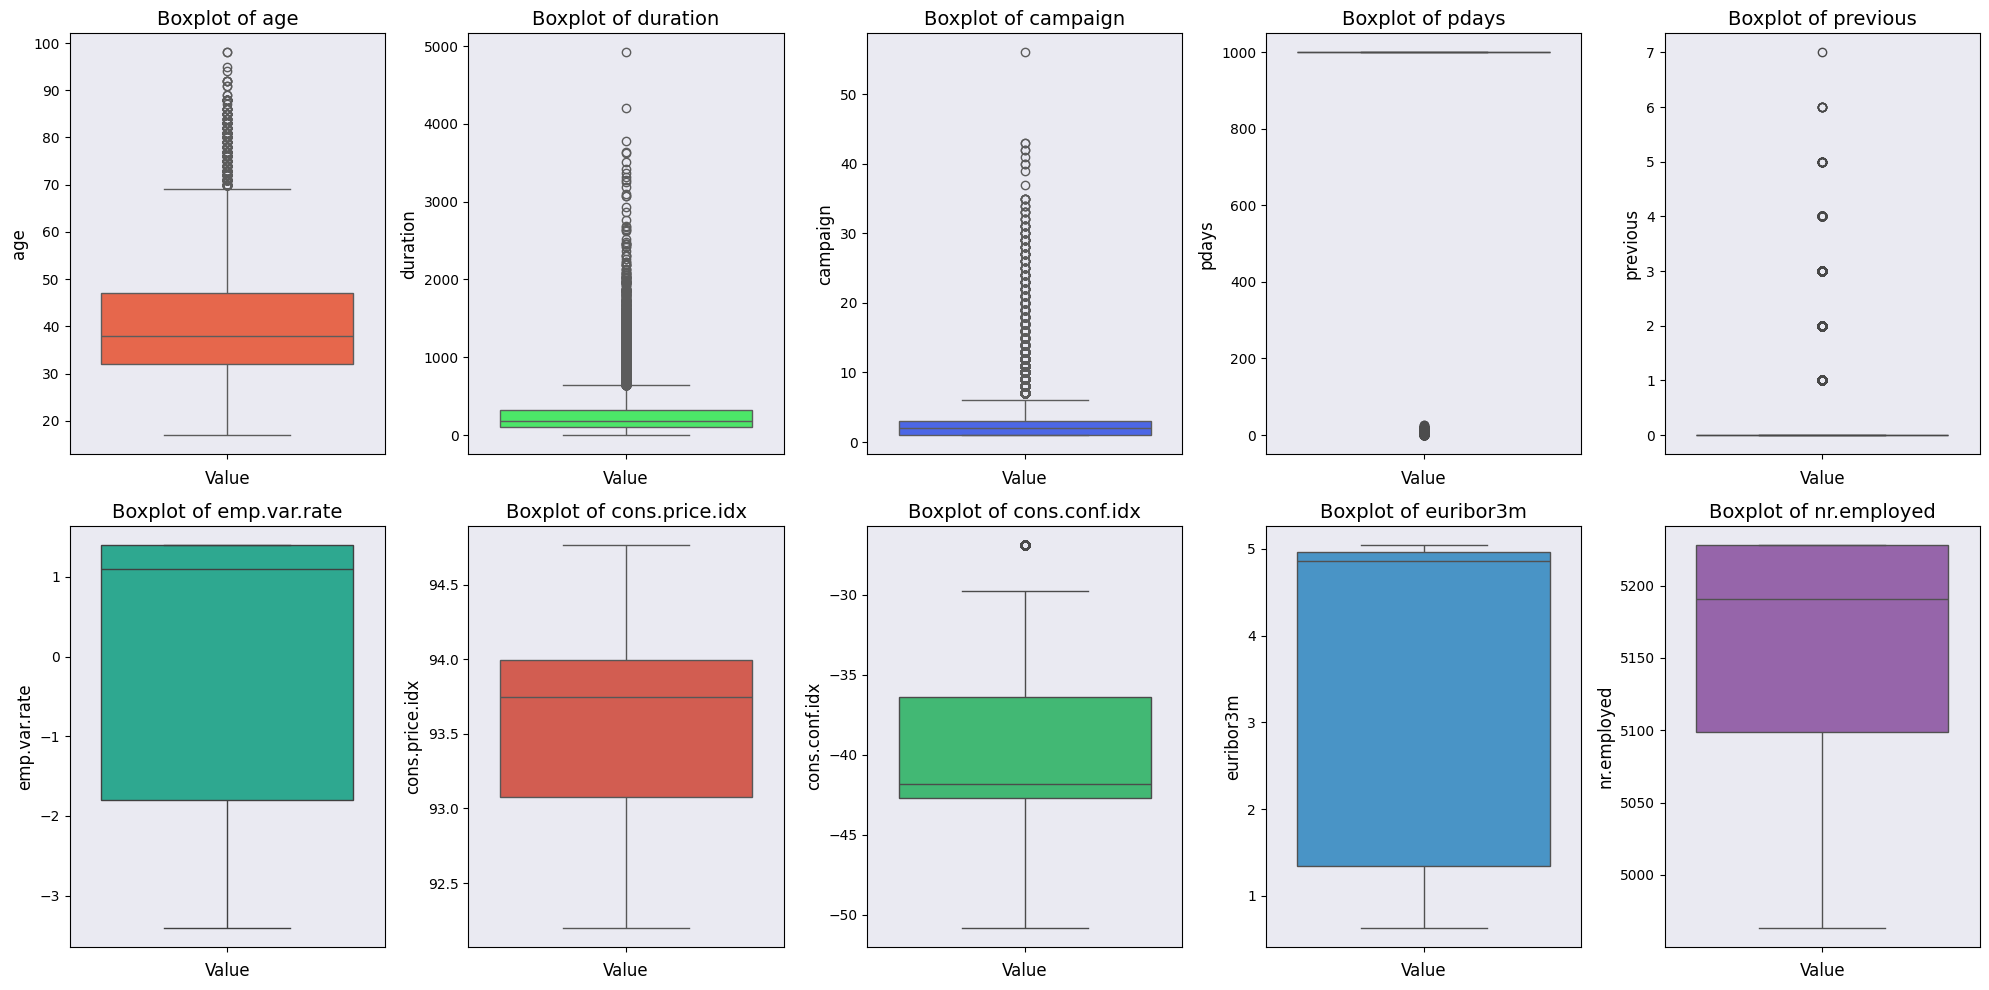

In [20]:
#Box-Plot for Numerical Variables
box_colors = ['#FF5733', '#33FF57', '#3357FF', '#F1C40F', '#8E44AD',
              '#1ABC9C', '#E74C3C', '#2ECC71', '#3498DB', '#9B59B6']
background_color = '#eaeaf2'

# Number of columns in each row
plots_per_row = 5

# Total number of plots
total_plots = len(numerical_data.columns)

# Number of rows needed
rows = math.ceil(total_plots / plots_per_row)

# Create subplots
fig, axes = plt.subplots(rows, plots_per_row, figsize=(20, 5 * rows))
axes = axes.flatten()  # Flatten axes for easy indexing

# Iterate over numerical columns and create boxplots
for i, col in enumerate(numerical_data.columns):
    sns.boxplot(data=numerical_data, y=col, ax=axes[i], color=box_colors[i % len(box_colors)])  # Cycle colors
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)
    axes[i].set_facecolor(background_color)  # Set background color
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_xlabel("Value", fontsize=12)

# Remove empty subplots
for j in range(len(numerical_data.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

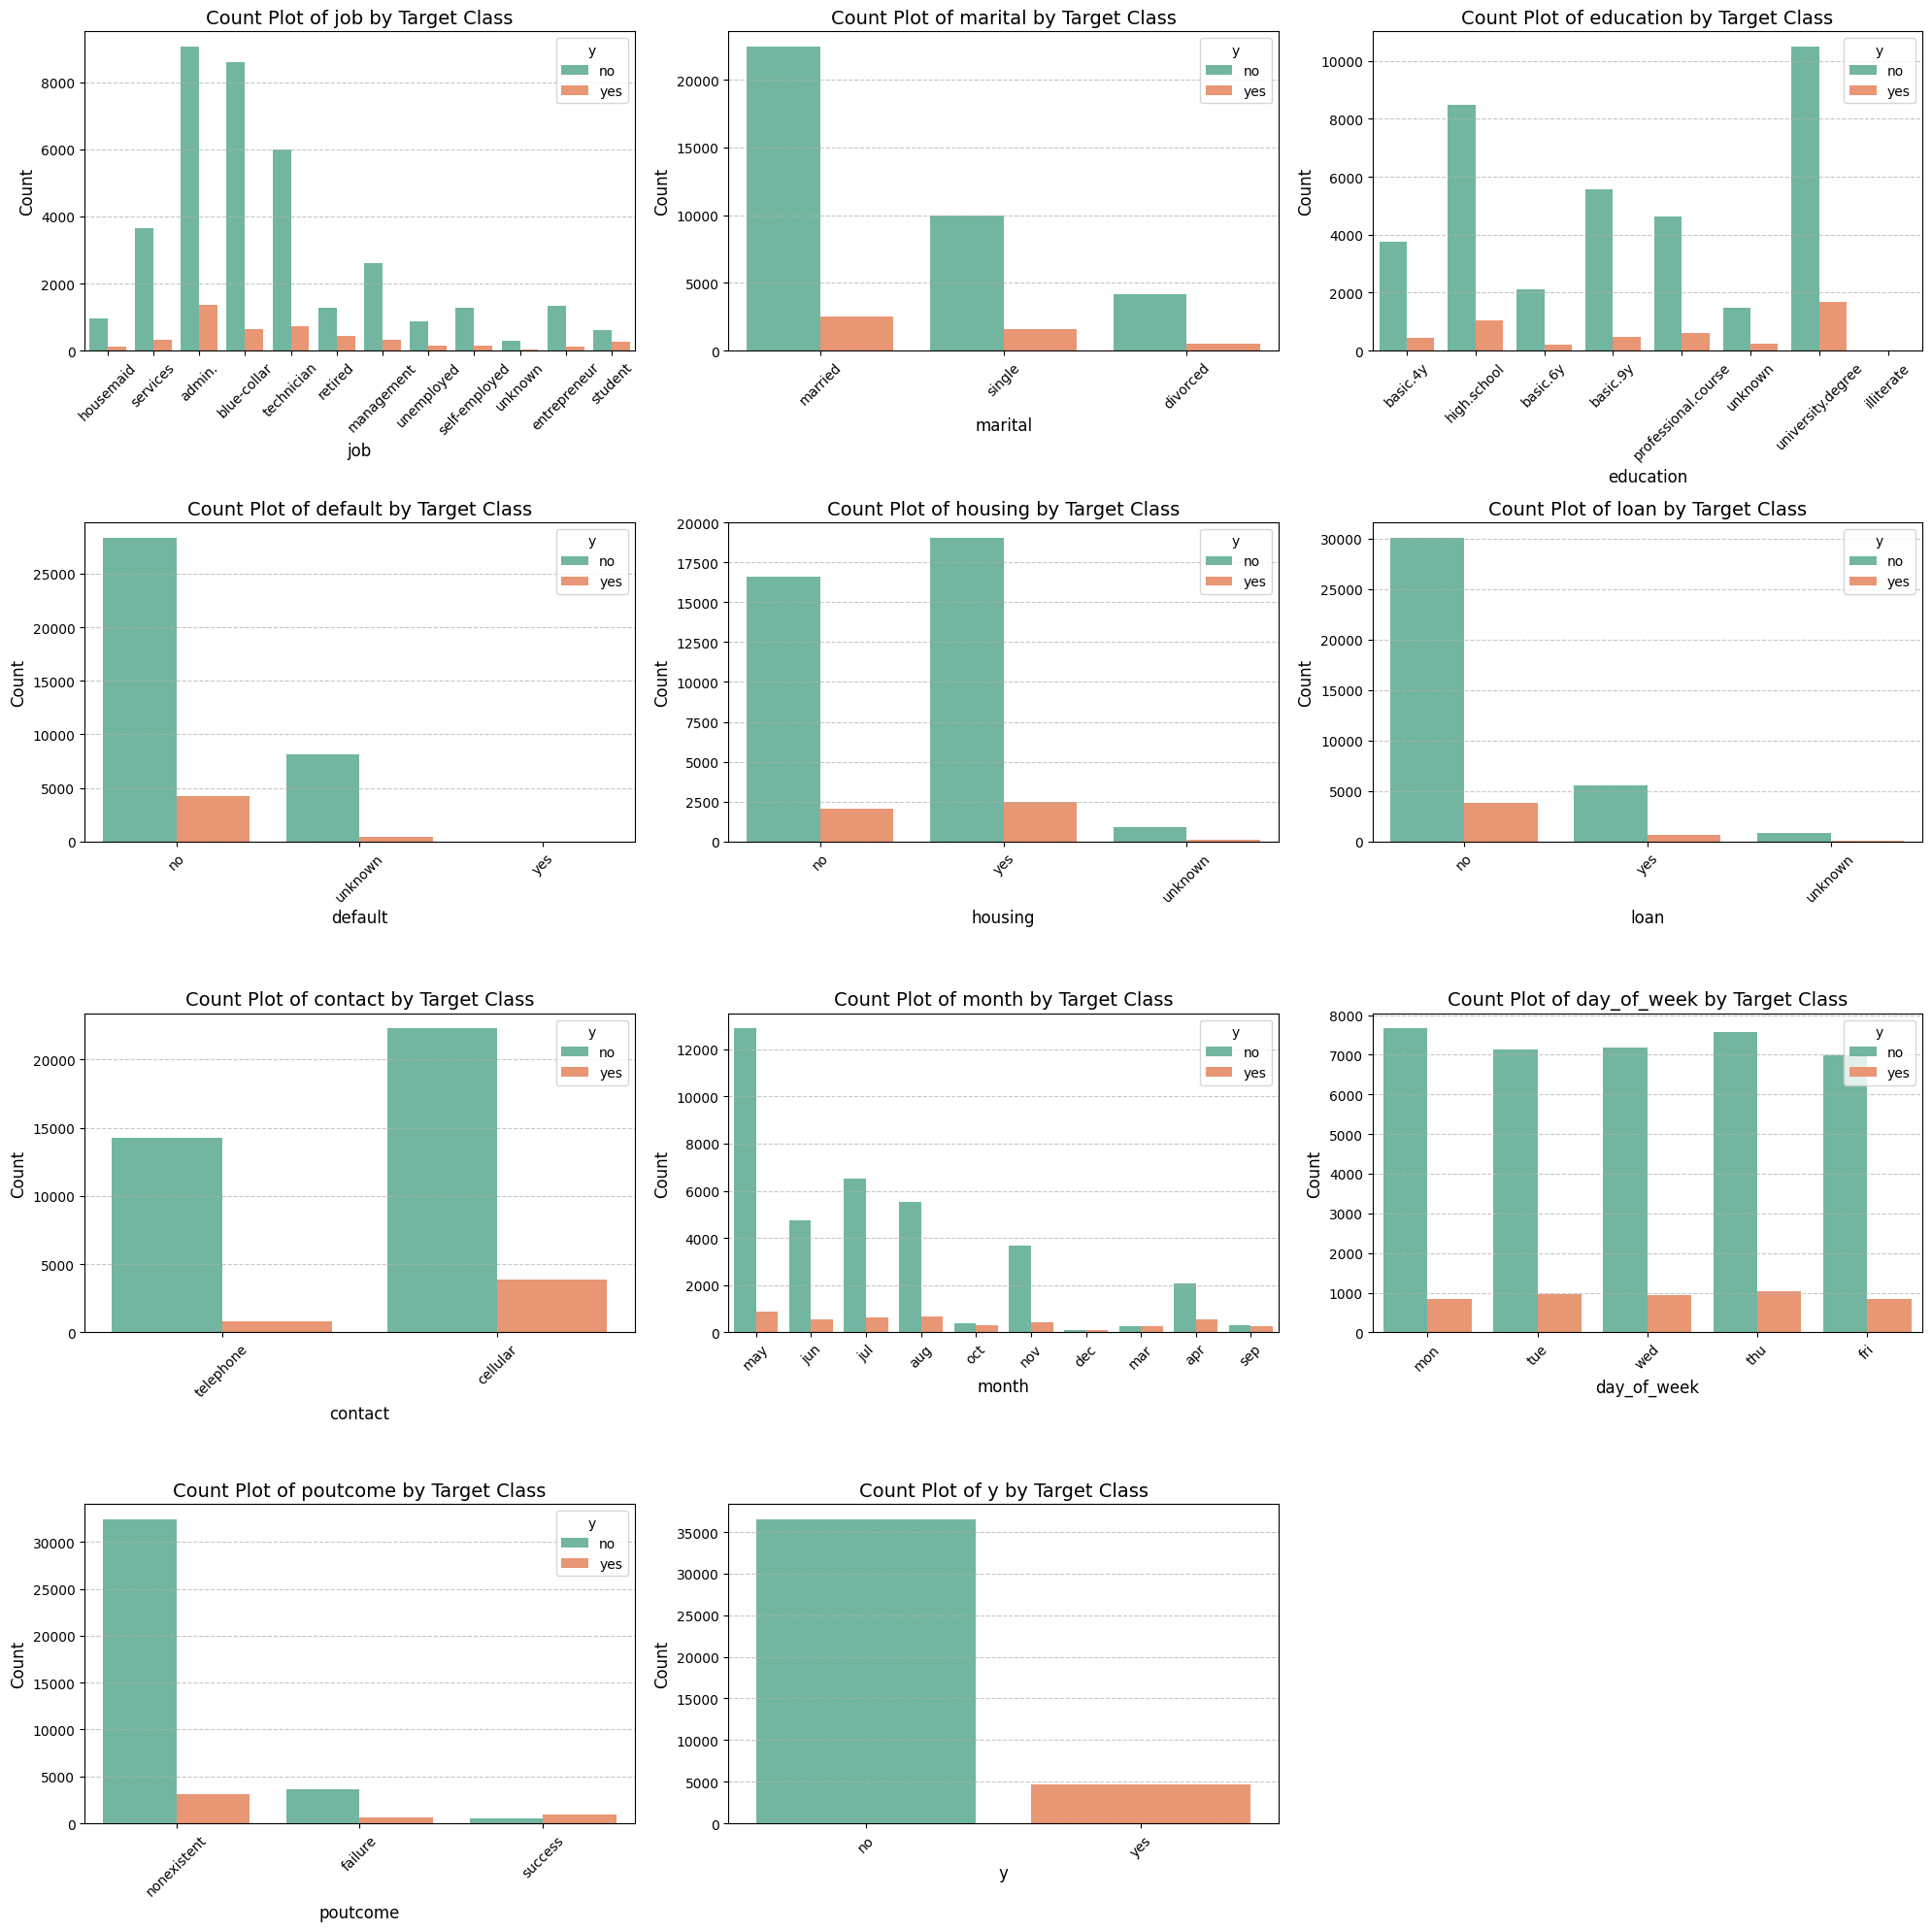

In [21]:
# Function to plot count bar charts comparing each categorical column with two 'y' variable
def plot_categorical_counts_with_target(data, categorical_cols, target_col='y', plots_per_row=3):
    total_plots = len(categorical_cols)
    rows = math.ceil(total_plots / plots_per_row)  # Calculate required rows
    fig, axes = plt.subplots(rows, plots_per_row, figsize=(20, 5 * rows))
    axes = axes.flatten()  # Flatten axes array for easy indexing

    for i, col in enumerate(categorical_cols):
        ax = axes[i]

        # Create count plot comparing with the target variable
        sns.countplot(data=data, x=col, hue=target_col, ax=ax, palette="Set2")

        # Set plot titles and labels
        ax.set_title(f'Count Plot of {col} by Target Class', fontsize=14)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Remove empty subplots
    for j in range(total_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

categorical_cols = data.select_dtypes(include=['object']).columns
# Plot count bar charts for all categorical columns comparing with the 'y' column
plot_categorical_counts_with_target(data, categorical_cols, target_col='y')

# **One-Hot Encoding**

In [22]:
# One-hot encoding for non-ordinal categorical variables
def one_hot_encode(df, target_column='y'):
    # Select all categorical columns except the target column
    categorical_columns = [col for col in df.select_dtypes(include=['object', 'category']).columns if col != target_column]
    # Apply one-hot encoding to the selected columns
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    return df

# Apply one-hot encoding to the dataset while excluding the target column
data = one_hot_encode(data, target_column='y')

# Display the shape of the dataset after encoding
print(f"Dataset shape after one-hot encoding: {data.shape}")

Dataset shape after one-hot encoding: (41176, 53)


# **Map Ordinal Categorical Variables -- Ordinal Encoding**

In [23]:
# Map ordinal categorical variables
def map_ordinal_variables(df):
    ordinal_mappings = {
        'education': {
            'unknown' : 0, 'illiterate': 1, 'basic.4y': 2, 'basic.6y': 3, 'basic.9y': 4,
            'high.school': 5, 'professional.course': 6, 'university.degree': 7
        },
        'housing': {'no': 0, 'yes': 1},
        'loan': {'no': 0, 'yes': 1},
        'default': {'no': 0, 'yes': 1}
    }

    for column, mapping in ordinal_mappings.items():
        if column in df.columns and column != 'y':
            df[column] = df[column].map(mapping)
    return df

# Apply ordinal mapping to the dataset
data = map_ordinal_variables(data)

# Display a message after mapping ordinal variables
print("Ordinal categorical variables have been mapped.")

Ordinal categorical variables have been mapped.


# **Remove Outliers**

In [24]:
# Remove outliers using Z-scores
print(f"Original dataset shape: {data.shape}")

# Select numerical columns
numerical_columns = numerical_data.columns
z_scores = zscore(data[numerical_columns])
data_cleaned = data[(np.abs(z_scores) < 3).all(axis=1)]
data = data_cleaned

# Display the shape of the dataset before and after outlier removal
print(f"Dataset shape after outlier removal: {data.shape}")

Original dataset shape: (41176, 53)
Dataset shape after outlier removal: (37302, 53)


# **Exclude the Duration**

In [25]:
# Exclude the 'duration' feature for realistic predictive modeling
if 'duration' in data.columns:
    data.drop(columns=['duration'], inplace=True)
    print("The 'duration' feature has been excluded from the dataset.")

The 'duration' feature has been excluded from the dataset.


# **Scale Numerical Features**

In [26]:
# Scale numerical features with handling for NaN and invalid values
def scale_numerical_features(df, target_column):
    # Identify numerical columns excluding the target variable
    numerical_columns = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != target_column]
    print(f"Numerical columns to scale (excluding '{target_column}'): {numerical_columns}")

    # Replace inf/-inf with NaN
    df[numerical_columns] = df[numerical_columns].replace([np.inf, -np.inf], np.nan)

    # Fill NaN values, handling columns with all NaNs using mean
    for col in numerical_columns:
        if df[col].isnull().all():
            df[col] = 0
        else:
            df[col] = df[col].fillna(df[col].mean())

    # Scale the numerical features
    scaler = StandardScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    return df

# Apply scaling to the dataset
data = scale_numerical_features(data, target_column='y')

# Display a message after scaling numerical features
print("Numerical features have been scaled successfully.")

Numerical columns to scale (excluding 'y'): ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Numerical features have been scaled successfully.


# **Encode the Target Variable**

In [27]:
# Encode the target variable (y)
def encode_target_variable(df):
    if 'y' in df.columns:
        unique_values = df['y'].unique()
        df['y'] = df['y'].map({'no': 0, 'yes': 1})
        if df['y'].isnull().any():
            print(f"Unmapped values in 'y': {df[df['y'].isnull()].unique()}")
    return df

# Apply target encoding to the variable 'y'
data = encode_target_variable(data)

# **Add Derived Features -- Numerical**

In [28]:
# Add derived features from numerical data
def add_derived_features(df):
    if 'age' in df.columns:
        df['age_squared'] = df['age'] ** 2
        # Handle invalid values for log transformation
        df['age_log'] = df['age'].apply(lambda x: np.log(x + 1) if x >= 0 else 0)
    if 'campaign' in df.columns and 'previous' in df.columns:
        df['contact_ratio'] = df['campaign'] / (df['previous'] + 1)  # Avoid division by zero
    return df

# Apply derived features to the dataset
data = add_derived_features(data)

# Display a message after adding derived features
print("Derived features have been added to the dataset.")

# Final imputation to handle any residual missing values
data.fillna(data.mean(), inplace=True)
print(f"Dataset shape after processing: {data.shape}")

Derived features have been added to the dataset.
Dataset shape after processing: (37302, 55)


# **Handle Target Column**

In [29]:
# Handle Target Column
def handle_target_column(df, target_column):
    X = None
    y = None

    # Check if the target column exists in the DataFrame
    if target_column in df.columns:
        X = df.drop(columns=[target_column])
        print("Target column dropped successfully.")
        y = df[target_column]
        print("Target column extracted successfully.")
    else:
        print(f"Error: Target column '{target_column}' not found in the DataFrame.")
        print(f"Available columns: {df.columns}")
    return X, y

# Use 'y' as the target column
X, y = handle_target_column(data, 'y')

Target column dropped successfully.
Target column extracted successfully.


# **Balancing using SMOTE**

In [30]:
# Balancing using SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
try:
    X_balanced, y_balanced = smote.fit_resample(X, y)
    print("Data balanced using SMOTE.")
except Exception as e:
    print(f"Error while balancing data with SMOTE: {e}")

Data balanced using SMOTE.


# **Data Visualization for Balancing**

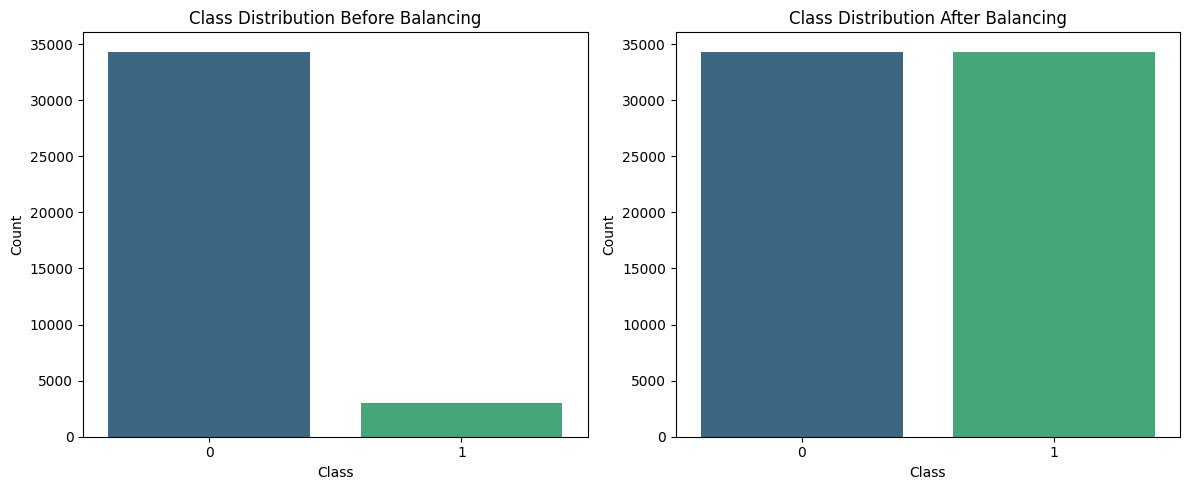


Class distribution in data before balancing: Counter({0: 34335, 1: 2967})
Class distribution in data after balancing: Counter({0: 34335, 1: 34335})


In [31]:
# Plot bar chart for class distribution before and after balancing
def plot_class_distribution(y, y_balanced):
    plt.figure(figsize=(12, 5))

    # Before balancing
    plt.subplot(1, 2, 1)
    sns.barplot(x=list(Counter(y).keys()), y=list(Counter(y).values()), hue=list(Counter(y).keys()), palette='viridis', legend=False)
    plt.title("Class Distribution Before Balancing")
    plt.xlabel("Class")
    plt.ylabel("Count")

    # After balancing
    plt.subplot(1, 2, 2)
    sns.barplot(x=list(Counter(y_balanced).keys()), y=list(Counter(y_balanced).values()), hue=list(Counter(y_balanced).keys()), palette='viridis', legend=False)
    plt.title("Class Distribution After Balancing")
    plt.xlabel("Class")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

# Call the function to plot class distributions
plot_class_distribution(y, y_balanced)
print()

# Check class distribution before SMOTE
print("Class distribution in data before balancing:", Counter(y))

# Check class distribution after SMOTE
print("Class distribution in data after balancing:", Counter(y_balanced))

# **Train-Test Split**

In [32]:
# Train-Test Split
def train_test_split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split_data(X_balanced, y_balanced)
print("Train-Test split completed successfully.")

Train-Test split completed successfully.


In [33]:
# Display dataset shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (54936, 54)
X_test shape: (13734, 54)
y_train shape: (54936,)
y_test shape: (13734,)


# **Import Necessary Libraries**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

In [35]:
# Ensure y is a flat array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# **Random Forest Classifier**

In [36]:
# Random Forest Classifier with Overfitting Check
def random_forest_model(X_train, y_train, X_test, y_test):
    print("Training Random Forest...")
    print()
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=15, min_samples_split=7, min_samples_leaf=7, max_features='sqrt')
    rf_model.fit(X_train, y_train)

    feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Predictions and probabilities using the original datasets
    rf_train_predictions = rf_model.predict(X_train)
    rf_test_predictions = rf_model.predict(X_test)

    # Calculate AUC for both training and test data
    rf_train_auc = roc_auc_score(y_train, rf_model.predict_proba(X_train)[:, 1])
    rf_test_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

    # Calculate accuracy for both training and test data
    rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
    rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)

    print("Random Forest Classification Report (Test Data):")
    print()
    print(classification_report(y_test, rf_test_predictions))
    print(f"Training ROC-AUC Score: {rf_train_auc:.4f}")
    print(f"Test ROC-AUC Score: {rf_test_auc:.4f}")
    print(f"Training Accuracy: {rf_train_accuracy:.4f}")
    print(f"Test Accuracy: {rf_test_accuracy:.4f}")

    # Overfitting Check
    if rf_train_auc - rf_test_auc > 0.1:
        print("Warning: Potential Overfitting Detected (Significant AUC Gap)")
    if rf_train_accuracy - rf_test_accuracy > 0.1:
        print("Warning: Potential Overfitting Detected (Significant Accuracy Gap)")

    return rf_model

# Evaluate Models
print("\n--- Random Forest Model ---\n")
rf_model = random_forest_model(X_train, y_train, X_test, y_test)


--- Random Forest Model ---

Training Random Forest...

Random Forest Classification Report (Test Data):

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      6814
           1       0.91      0.88      0.89      6920

    accuracy                           0.89     13734
   macro avg       0.89      0.89      0.89     13734
weighted avg       0.89      0.89      0.89     13734

Training ROC-AUC Score: 0.9725
Test ROC-AUC Score: 0.9582
Training Accuracy: 0.9132
Test Accuracy: 0.8942


# **Random Forest Classifier - Confusion Matrix**

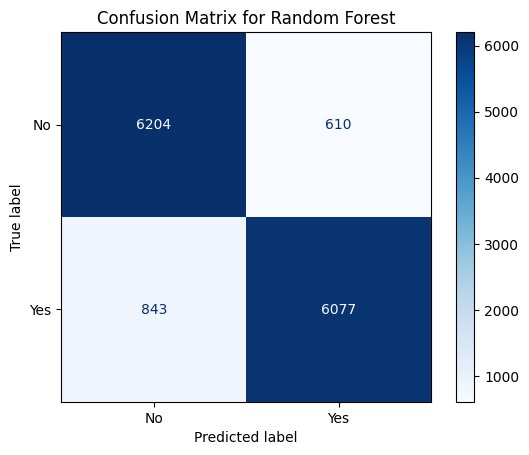

In [37]:
# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = (model.predict(X_test) > 0.5).astype(int).ravel() # This line is changed
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(rf_model, X_test, y_test, "Random Forest")

# **Visualization of Feature Importance for Random Forest**


--- Feature Importance for Random Forest ---



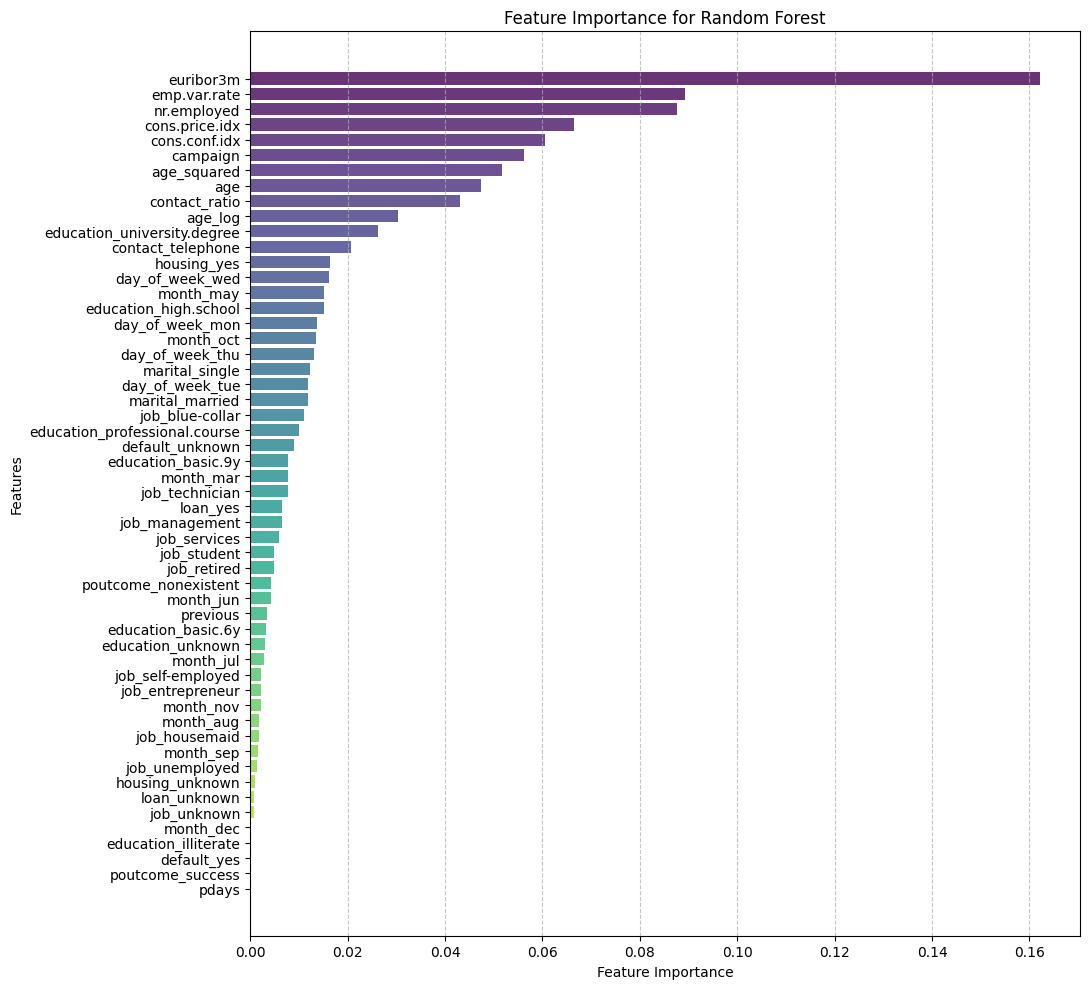

In [38]:
from matplotlib import colormaps
# Function to plot feature importance
def plot_feature_importance_with_gradient(feature_importance_df, model_name):
    plt.figure(figsize=(11, 10))
    y_positions = np.arange(len(feature_importance_df['Feature']))

    # Use the updated method to get a colormap for gradient colors
    cmap = colormaps['viridis']  # Access the colormap directly
    colors = [cmap(i / len(feature_importance_df)) for i in range(len(feature_importance_df))]

    # Plot the bars with spacing and gradient colors
    plt.barh(y_positions, feature_importance_df['Importance'], color=colors, alpha=0.8)
    plt.yticks(y_positions, feature_importance_df['Feature'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title(f'Feature Importance for {model_name}')
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
    plt.tight_layout()
    plt.show()

# Random Forest Feature Importance
def random_forest_feature_importance(model, feature_names):
    importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)
    plot_feature_importance_with_gradient(feature_importance_df, 'Random Forest')

# Plot feature importance for Random Forest
print("\n--- Feature Importance for Random Forest ---\n")
random_forest_feature_importance(rf_model, X_train.columns)

# **Neural Network Model**

In [39]:
# Neural Network Model with Overfitting Check
def neural_network_model(X_train, y_train, X_test, y_test, input_dim):
    print("Training Neural Network...")

    # Define the model
    nn_model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile the model
    nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model and capture training history
    history = nn_model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=32,
        verbose=2,
        validation_data=(X_test, y_test)
    )

    # Evaluate the model
    nn_predictions = (nn_model.predict(X_test) > 0.5).astype(int)
    nn_auc = roc_auc_score(y_test, nn_model.predict(X_test))
    print()
    print("Neural Network Testing Classification Report:")
    print()
    print(classification_report(y_test, nn_predictions))
    print(f"Neural Network Test ROC-AUC Score: {nn_auc:.4f}")

    # Check for overfitting
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    print(f"Final Training Loss: {train_loss[-1]:.4f}")
    print(f"Final Validation Loss: {val_loss[-1]:.4f}")
    print(f"Final Training Accuracy: {train_acc[-1]:.4f}")
    print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")

    if train_loss[-1] < val_loss[-1] and (val_loss[-1] - train_loss[-1]) > 0.1:
        print("Warning: Potential Overfitting Detected (Significant Loss Gap)")
    if train_acc[-1] > val_acc[-1] and (train_acc[-1] - val_acc[-1]) > 0.1:
        print("Warning: Potential Overfitting Detected (Significant Accuracy Gap)")

    return nn_model

# Run the model
print("\n--- Neural Network Model ---\n")
nn_model = neural_network_model(X_train, y_train, X_test, y_test, input_dim=X_train.shape[1])


--- Neural Network Model ---

Training Neural Network...
Epoch 1/20
1717/1717 - 5s - 3ms/step - accuracy: 0.7643 - loss: 0.4950 - val_accuracy: 0.8028 - val_loss: 0.4286
Epoch 2/20
1717/1717 - 3s - 2ms/step - accuracy: 0.8106 - loss: 0.4165 - val_accuracy: 0.8253 - val_loss: 0.3830
Epoch 3/20
1717/1717 - 7s - 4ms/step - accuracy: 0.8244 - loss: 0.3847 - val_accuracy: 0.8274 - val_loss: 0.3712
Epoch 4/20
1717/1717 - 3s - 2ms/step - accuracy: 0.8326 - loss: 0.3643 - val_accuracy: 0.8431 - val_loss: 0.3441
Epoch 5/20
1717/1717 - 3s - 2ms/step - accuracy: 0.8381 - loss: 0.3515 - val_accuracy: 0.8461 - val_loss: 0.3354
Epoch 6/20
1717/1717 - 5s - 3ms/step - accuracy: 0.8442 - loss: 0.3421 - val_accuracy: 0.8467 - val_loss: 0.3297
Epoch 7/20
1717/1717 - 5s - 3ms/step - accuracy: 0.8474 - loss: 0.3332 - val_accuracy: 0.8525 - val_loss: 0.3244
Epoch 8/20
1717/1717 - 5s - 3ms/step - accuracy: 0.8491 - loss: 0.3295 - val_accuracy: 0.8550 - val_loss: 0.3162
Epoch 9/20
1717/1717 - 3s - 2ms/step -

# **Neural Network Model -- Confusion Matrix**

430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


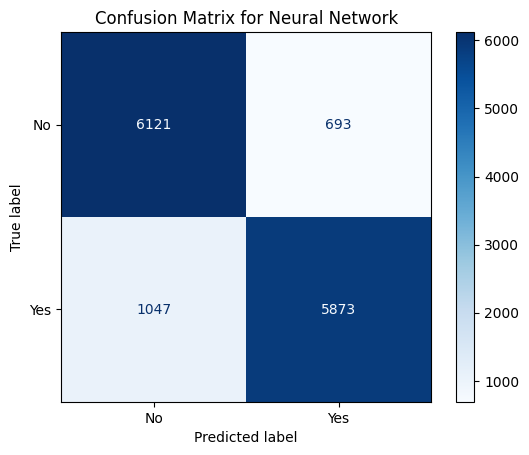

In [40]:
# Plot confusion matrix for Neural Network
plot_confusion_matrix(nn_model, X_test, y_test, "Neural Network")

# **ROC-AUC Curve for Both Models**

430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


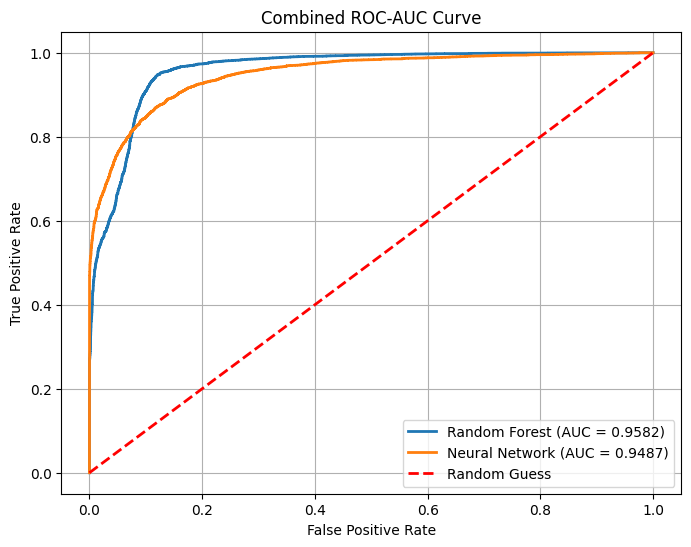

In [41]:
# Function to plot ROC-AUC curve for multiple models
def plot_combined_roc_auc(models, X_test, y_test):
    plt.figure(figsize=(8, 6))

    for model_name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_test).ravel()
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Combined ROC-AUC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Combine and plot ROC-AUC for both models
models = {
    "Random Forest": rf_model,
    "Neural Network": nn_model
}
plot_combined_roc_auc(models, X_test, y_test)

# **Metrics Comparision of Both Models**

430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

--- Custom Model Comparison ---

                Metric  Random Forest  Neural Network
0             Accuracy       0.894204        0.873307
1  Precision (Class 0)       0.880375        0.853934
2  Precision (Class 1)       0.908778        0.894456
3   F1-Score (Class 0)       0.895174        0.875554
4   F1-Score (Class 1)       0.893217        0.870977
5     Recall (Class 1)       0.878179        0.848699
6     Recall (Class 0)       0.910478        0.898298



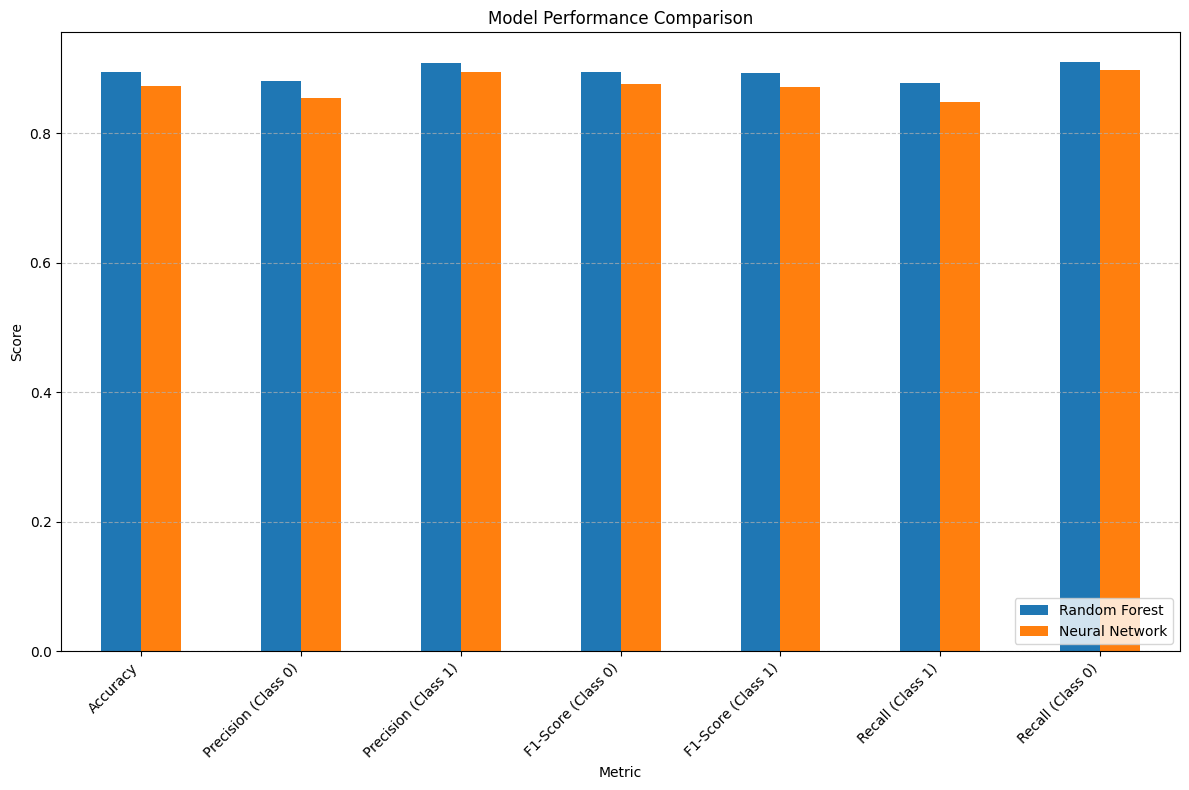

In [42]:
# Compare Metrics of both models in Specified Order
def compare_models_custom(y_test, rf_predictions, nn_predictions):
    metrics = [
        'Accuracy',
        'Precision (Class 0)', 'Precision (Class 1)',
        'F1-Score (Class 0)', 'F1-Score (Class 1)',
        'Recall (Class 1)', 'Recall (Class 0)'
    ]

    rf_metrics = [
        accuracy_score(y_test, rf_predictions),
        precision_score(y_test, rf_predictions, pos_label=0),
        precision_score(y_test, rf_predictions, pos_label=1),
        f1_score(y_test, rf_predictions, pos_label=0),
        f1_score(y_test, rf_predictions, pos_label=1),
        recall_score(y_test, rf_predictions, pos_label=1),
        recall_score(y_test, rf_predictions, pos_label=0)
    ]

    nn_metrics = [
        accuracy_score(y_test, nn_predictions),
        precision_score(y_test, nn_predictions, pos_label=0),
        precision_score(y_test, nn_predictions, pos_label=1),
        f1_score(y_test, nn_predictions, pos_label=0),
        f1_score(y_test, nn_predictions, pos_label=1),
        recall_score(y_test, nn_predictions, pos_label=1),
        recall_score(y_test, nn_predictions, pos_label=0)
    ]

    # Create a DataFrame to compare metrics
    comparison_df = pd.DataFrame({
        'Metric': metrics,
        'Random Forest': rf_metrics,
        'Neural Network': nn_metrics
    })

    print("\n--- Custom Model Comparison ---\n")
    print(comparison_df)
    print()
    return comparison_df

# Predictions for Random Forest
rf_predictions = rf_model.predict(X_test)

# Predictions for Neural Network
nn_predictions = (nn_model.predict(X_test) > 0.5).astype(int)

# Compare metrics in the specified order
comparison_df_custom = compare_models_custom(y_test, rf_predictions, nn_predictions)

# Plot the comparison as a bar chart
def plot_model_comparison_custom(df):
    df.set_index('Metric', inplace=True)
    df.plot(kind='bar', figsize=(12, 8))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='lower right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot custom model comparison
plot_model_comparison_custom(comparison_df_custom)